# Linear Regression

This machine learning method is one of the most fundamental and widely used techniques used for prediction. It uses the equation of a line with intercept and slope coefficients to estimate a value based on one or more inputs (response variables). Linear regression is useful for predicting values not explicitly present in our data set and to see which factors contribute most to the prediction. However, it is important to note that strength of predictors do not imply causation. A strong correlation between a predictor and the response variable only means that they consistently change together by a certain factor. Causal analysis is needed to see if the predictor actually affects the characteristic we want to predict.

Hypothesis testing uses a null hypothesis and tries to estimate the existence or absence of some effect. Here, by doing linear regression, we ask for the magnitude of this effect and attempt to predict future values. More specifically, we attempt to predict continues values, as opposed to other machine learning algorithms that classify data into discrete categories.

### Uses


- Forecasting
- Trend Analysis
- Measuring strength of predictors

### Drawbacks

- Data must be independent
- Outliers have greater effect on model
- Can lose preditive power for highly complex/dimensional problems

### Example Problem

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [2]:
data = pd.read_csv('avocado.csv')
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


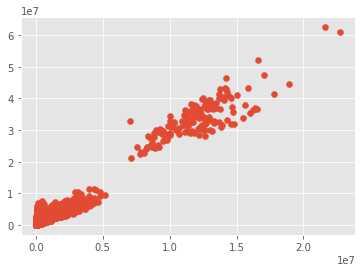

In [8]:
# Checking data for linearity
plt.scatter(data["4046"].values, data["Total Volume"].values)
plt.show()

In [9]:
# Making data vectors for PLU 4046 (Small Avocados) and Total Sales Volume
smallHaas = data["4046"].values
tvolume = data["Total Volume"].values

In [11]:
mean_smallHaas = np.mean(smallHaas)
mean_tvolume = np.mean(tvolume)
n = len(smallHaas)

denominator = sum(smallHaas**2)-sum(smallHaas)**2/n
numerator = sum(smallHaas*tvolume) - sum(smallHaas)*sum(tvolume)/n

slope = numerator/denominator
intercept = mean_tvolume - (slope*mean_smallHaas)

print(intercept, slope)

68410.21144909458 2.6696631771349897


Linear Model is *Total Volume = 68410.2114 + SmallHaas(2.6697)*

In [12]:
max_x = np.max(smallHaas) + 1000
min_x = np.min(smallHaas) - 1000

X = np.linspace(min_x, max_x, 1000)
Y = intercept + slope*X

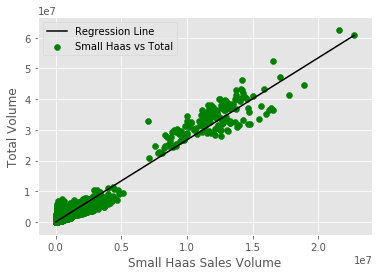

In [13]:
plt.plot(X,Y, label = "Regression Line", color = "black")
plt.scatter(smallHaas, tvolume, label = "Small Haas vs Total", color = "green")
plt.xlabel("Small Haas Sales Volume")
plt.ylabel("Total Volume")
plt.legend()
plt.show()

In [59]:
# Here, we calculate the mean squared error to see how good the model is
rmse = 0
for i in range(n):
    y_pred = intercept + slope*smallHaas[i]
    rmse += (tvolume[i] - y_pred)**2
rmse = np.sqrt(rmse/n)
print(rmse)

722618.7192859858


In [61]:
# r2 is a measure of how much of the data's variation can be explained by the model
# Our score indicates that 95% of the data's variation can be explained by our model. While a high score does not
# guarantee a good model, it is encouraging
ss_t = 0
ss_r = 0
for i in range(n):
    y_pred = intercept + slope*smallHaas[i]
    ss_t += (tvolume[i] - mean_tvolume) ** 2
    ss_r += (tvolume[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.9562163577742853


In [134]:
# function to make predictions from the dataset
# returns actual value, predicted value, and how off we were as a percentage of the actual value

def predict(x):
    y_pred = intercept + slope*data["4046"][x]
    y_actual = data["Total Volume"][x]
    loss = ((y_actual - y_pred)/y_actual)*100
    print("Actual:",y_actual, "Predicted:",y_pred, "Percent Loss:",loss)

# function that predicts Total Volume from new numbers not in the dataset
def predict_new(x):
    pred = intercept + slope*x
    return pred

In [135]:
predict(0)
predict_new(1000)

Actual: 64236.62 Predicted: 71177.9580513575 Percent Loss: -10.80588930637618


71079.87462622958